 # <div style="background-color:#FA8072; text-align:center; vertical-align: middle; padding:40px 0;"><p style="font-family: Arial; font-size:1.4em; color:black; text-align: center;"> Predicting whether a product will go on backorder. </p></div>

# <p style="font-family: Arial; font-size:1.4em;color:#3498DB;"> Problem Statement </p>

* Predicting whether a product will go on backorder.

* Product backorder may be the result of strong sales performance (e.g. the product is in such high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs).

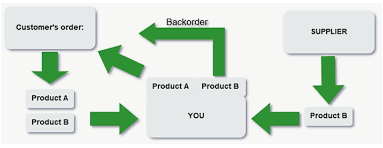

# <font style=color:#3498DB;>Data </font>
 

* Outcome: whether the part went on backorder
* Predictors: Current inventory, sales history, forecasted sales, part risk flags etc. (22 predictors in total)

# <font style=color:#3498DB;> Modeling

### _Key considerations of the data:_

* Outliers and skewed predictors: Part quantities (stock, sales etc.) can be on very different scales.
* Missing data: One variable have data that are missing.
* n>>p: There are many observations (61589) relative to the number of predictors (22).


# <font color='#3498DB'> Implemented Models </font>




<a name="(1)-PCA"></a>[1) PCA](#(1)-PCA) 

<a name="(2)-Logistic-Regression-using-PCA"></a>[2)Logistic Regression using PCA](#(2)-Logistic-Regression-using-PCA) 



<a name="(3)-Logistic-Regression"></a>[3) Logistic Regression](#(3)-Logistic-Regression) 


<a name="(4)-Naive-Bays"></a>[4) Naive Bay's](#(4)-Naive-Bays) 



<a name="(5)-(a)-SVM"></a>[5) (a) SVM](#(5)-(a)-SVM) 



<a name="(5)-(b)-SVM-using-Grid-search"></a>[5) (b) SVM using Grid search](#(5)-(b)-SVM-using-Grid-search) 



<a name="(6)-KNN"></a>[6) KNN](#(6)-KNN) 



<a name="(7)-Decision-Tree"></a>[7) Decision Tree](#(7)-Decision-Tree) 



<a name="(8)-(a)-Random-Forest"></a>[8)(a) Random Forest](#(8)-(a)-Random-Forest) 



<a name="(8)-(b)-Random-Forest"></a>[8) (b) Random Forest](#(8)-(b)-Random-Forest) 



<a name="(9)-AdaBoost"></a>[9) AdaBoost](#(9)-AdaBoost) 



<a name="(10)-Gradient-GBM-Classifier"></a>[10) Gradient GBM Classifier](#(10)-Gradient-GBM-Classifier) 



<a name="(11)-XGBoost"></a>[11) XGBoost](#(11)-XGBoost) 



### Also Used

<a name="Regularization"></a>[A) Regularization](#Regularization) 


<a name="Voting-Ensemble-for-Classification"></a>[B) Voting Ensemble for Classification](#Voting-Ensemble-for-Classification) 



<a name="Deep-Learning-Model"></a>[C) Deep Learning Model](#Deep-Learning-Model) 



# Dealing with missing data 

* The few variables with missing data had medians imputed, and a binary variable was created to indicate whether the observation had missing data.

# Validation

* We use 10-fold cross-validation on logistic regression.
* Grid search on SVM.
* The ROC Area Under the Curve (AUC) was used as a validation metric because the outcome is so imbalanced. By looking at ROC curves, we may determine a cutoff threshold for classification after fitting the models, rather than naively assuming a threshold of 0.5.

# Choosing a classification threshold

* We can choose a threshold that finds a balance of precision and recall appropriate for our problem. For example, we may be more concerned with the consequences of failure to predict a product going on backorder (e.g. canceled orders, customer loss) than the consequences of backorder false alarms (e.g. unnecessary overstocking, higher inventory costs).

# Import Data and basic data manipulation

<div class="alert alert-block alert-info">
I also performed basic manipulations such as recoding the binary variables as 0/1 rather than Yes/No.
</div> 

In [3]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plottingimport pandas as pd
import pandas as pd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import random
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve



### Get Working Directory and Set Current Directory


In [368]:
import os
os.getcwd()
os.chdir("/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/4 MODULE INSOFE CSE 7321c/20190303_Batch55_CSE7312c_Lab02_DeepLearning_HOT")

<b>Reading the data into dataframes</b>

<div class="alert alert-block alert-warning">
When You have Train dataset and Test Dataset then don't merge it, preprocess on both Seperately.
</div>

In [5]:
BackOrders = pd.read_csv("BackOrders.csv")


## Understanding The Dataset

### _Structure of Dataset_
Check the datatype and structure of Backorder data
* 3 columns datatypes are float
* 13 columns datatypes are integer
* 7 columns datatypes are integer

<b>Numerical Variable</b>
* national_inv, lead_time, in_transit_qty, forecast_3_month, forecast_6_month , forecast_9_month, sales_1_month, sales_3_month, sales_6_month, sales_9_month, min_bank, pieces_past_due, perf_6_month_avg, perf_12_month_avg, local_bo_qty.

<b>Categorical variable </b>

* potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop.

<b>Target variable</b>
* went_on_backorder

In [115]:
BackOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 23 columns):
sku                  61589 non-null int64
national_inv         61589 non-null int64
lead_time            58186 non-null float64
in_transit_qty       61589 non-null int64
forecast_3_month     61589 non-null int64
forecast_6_month     61589 non-null int64
forecast_9_month     61589 non-null int64
sales_1_month        61589 non-null int64
sales_3_month        61589 non-null int64
sales_6_month        61589 non-null int64
sales_9_month        61589 non-null int64
min_bank             61589 non-null int64
potential_issue      61589 non-null object
pieces_past_due      61589 non-null int64
perf_6_month_avg     61589 non-null float64
perf_12_month_avg    61589 non-null float64
local_bo_qty         61589 non-null int64
deck_risk            61589 non-null object
oe_constraint        61589 non-null object
ppap_risk            61589 non-null object
stop_auto_buy        61589 non-null objec

<b>Summary of BackOrders data</b>

In [116]:
BackOrders.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,6.158900e+04,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,4.196427e+02,43.087256,1.605400,-6.264182,-5.863664,1.205361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,1.269858e+04,959.614135,42.309229,25.537906,24.844514,29.981155
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.640000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.820000,0.800000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,5.100000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


In [36]:
BackOrders.shape

(61589, 22)

<b>View the 5 rows of dataset from Top</b>

* There are negative values in the national_inv column, these negative values mean that the shop ordered more stock than is available. The point is that these negative values are valid values.

In [384]:
BackOrders.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


<b>View the 5 rows of dataset from Bottom</b>

In [385]:
BackOrders.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
61584,1397275,6,8.0,0,24,24,24,0,7,9,...,0,0.98,0.98,0,No,No,No,Yes,No,No
61585,3072139,130,2.0,0,40,80,140,18,108,230,...,0,0.51,0.28,0,No,No,No,Yes,No,No
61586,1909363,135,9.0,0,0,0,0,10,40,65,...,0,1.00,0.99,0,No,No,Yes,Yes,No,No
61587,1845783,63,NaN,0,0,0,0,452,1715,3425,...,0,-99.00,-99.00,1,No,No,No,No,No,Yes
61588,1200539,0,2.0,0,8,8,8,0,1,1,...,0,0.79,0.78,0,Yes,No,No,Yes,No,Yes


# Dealing with Missing Data

 Only one predictor have missing data 
  * lead_time (3403)

In [386]:
BackOrders.isnull().sum(axis=0) 

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [388]:
BackOrders.isnull().sum().sum()

3403

In [387]:
#View count/percentage of missing cells
tot=BackOrders.isnull().sum().sort_values(ascending=False)
perc=(round(100*BackOrders.isnull().sum()/BackOrders.isnull().count(),1)).sort_values(ascending=False)
missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
missing_data


,Missing,Percent
lead_time,3403,5.5
went_on_backorder,0,0.0
sales_9_month,0,0.0
national_inv,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0
sales_1_month,0,0.0
sales_3_month,0,0.0


* For this variable, we impute the medians for the missing observations. 

### Drop the Column 

In [6]:
#Data Cleaning
# Drop the sku column
BackOrders.drop(['sku'],axis=1, inplace = True)
BackOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 22 columns):
national_inv         61589 non-null int64
lead_time            58186 non-null float64
in_transit_qty       61589 non-null int64
forecast_3_month     61589 non-null int64
forecast_6_month     61589 non-null int64
forecast_9_month     61589 non-null int64
sales_1_month        61589 non-null int64
sales_3_month        61589 non-null int64
sales_6_month        61589 non-null int64
sales_9_month        61589 non-null int64
min_bank             61589 non-null int64
potential_issue      61589 non-null object
pieces_past_due      61589 non-null int64
perf_6_month_avg     61589 non-null float64
perf_12_month_avg    61589 non-null float64
local_bo_qty         61589 non-null int64
deck_risk            61589 non-null object
oe_constraint        61589 non-null object
ppap_risk            61589 non-null object
stop_auto_buy        61589 non-null object
rev_stop             61589 non-null obje

### Count the NO and YES value in went_on_backorder(target) variable

In [392]:
BackOrders['went_on_backorder'].value_counts()

No     50296
Yes    11293
Name: went_on_backorder, dtype: int64

## Understand Data

1. The data are a mix of string, integer and floating point values.

2. The sku has a unique value for each row, so it is the index column and should be dropped.

3. The features with string values are categorical features that only contain 'yes' and 'no'. They can be changed to represent the same information in numerical values.

4. The numerical features have different scales, which may be a problem for some machine learning algorithms. The features should be rescaled to have similar scale.

5. There are missing values in lead_time. These missing values need to be replaced or the samples with missing values need to be removed.

6. lead_time has 3403 (5.5%)missing values

7. There are 50296 samples when the product did not go on backorder. There are 11293 samples when the product did go on backorder.

* Assign variable(quantvars) for quantitative variables

In [129]:
#define quantitative variable lists 
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']

* To store all categorical variables in new variable i.e. catvars.

In [130]:
#define categorical variable lists 
catvars=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']

# Exploratotary Data Analysis

national_inv


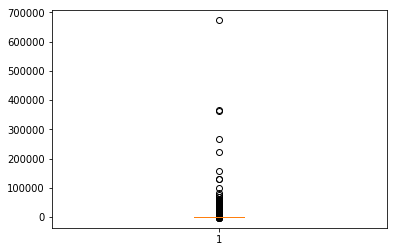

lead_time


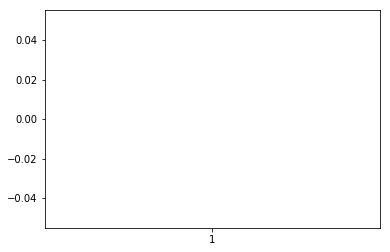

in_transit_qty


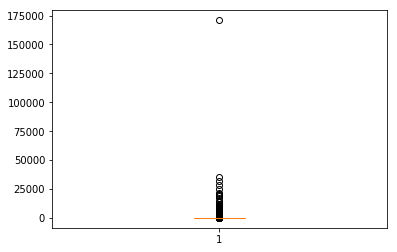

forecast_3_month


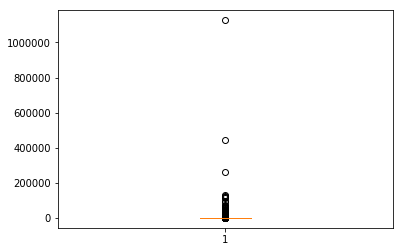

forecast_6_month


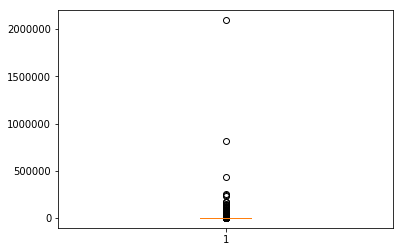

forecast_9_month


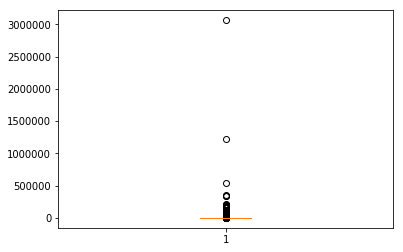

sales_1_month


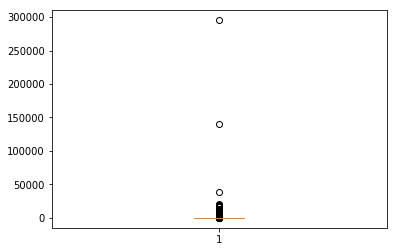

sales_3_month


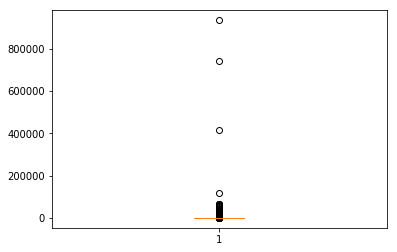

sales_6_month


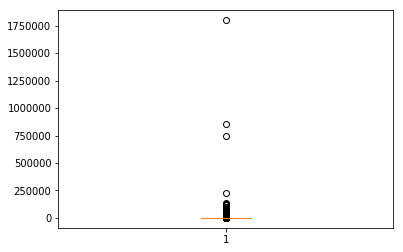

sales_9_month


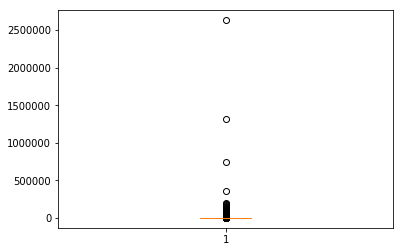

min_bank


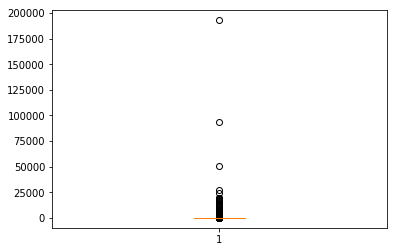

pieces_past_due


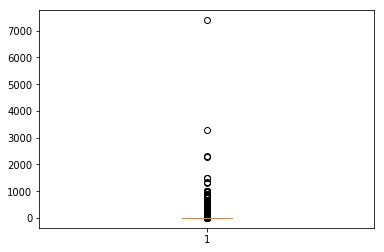

perf_6_month_avg


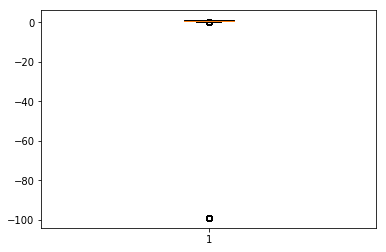

perf_12_month_avg


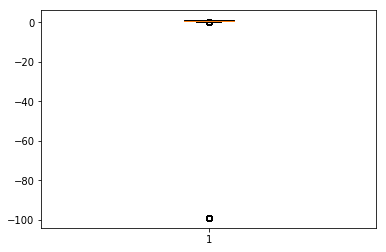

local_bo_qty


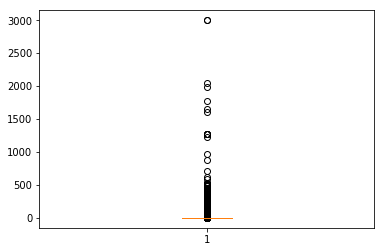

In [131]:
#---Quantitative variables-----#

#summary of quantitative variables
BackOrders[quantvars].describe().transpose() 

#means by backorder status
BackOrders.pivot_table(values=quantvars,index=['went_on_backorder'])

#boxplots of quantitative variables
for col in quantvars:
    print(col)
    plt.boxplot(BackOrders[col])
    plt.show()


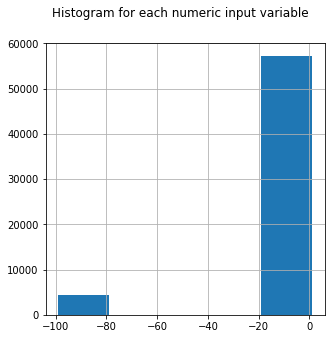

In [381]:
BackOrders['perf_6_month_avg'].hist(bins=5, figsize=(5,5))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

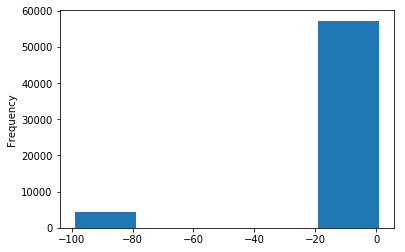

In [91]:
# Look at histogram of perf_6_month_avg
BackOrders.perf_6_month_avg.plot.hist(bins=5)

<b> histogram for perf_6_month_avg</b>
* The distribution of performance values is left skewed. 

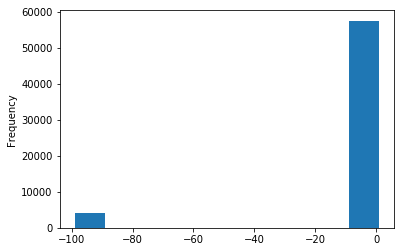

In [316]:
BackOrders.perf_12_month_avg.plot.hist()

### Histogram for perf_12_month_avg

* This is similar to the histogram for perf_6_month_avg. The distribution of performance values is left skewed. 

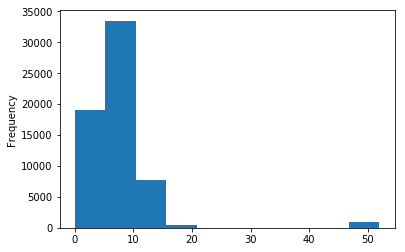

In [317]:
# Look at histogram of lead_time
BackOrders.lead_time.plot.hist()

### Histogram for lead_time

* The distribution of lead times is right skewed. Most lead times fall in the range 0-20. It should be OK to assume that samples with missing lead times will have lead times close to the median lead time.

### Take a closer look at correlations with scatter plots.

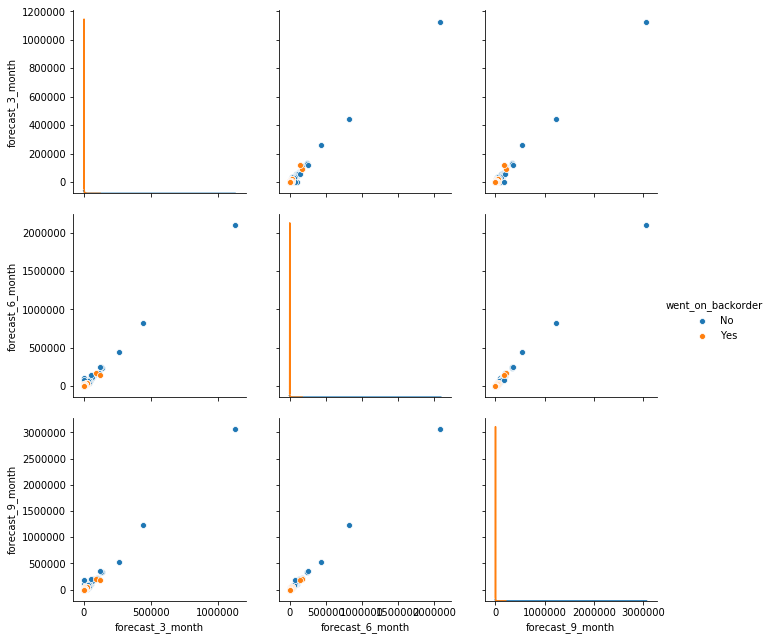

In [319]:
# Forecast columns
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']

# Pair-wise scatter plot for the forecasts
sns.pairplot(BackOrders, vars=forecasts, hue='went_on_backorder', size=3)

# Show the plot
plt.show()

### forecasts pair-wise scatter plots explaination

* The forecast values over each time frame have very close linear correlation with each other, as expected from the correlation matrix. The forecast values cover a wide range from 0 to over 1 million. Backorders only occur when the forecast value is low.

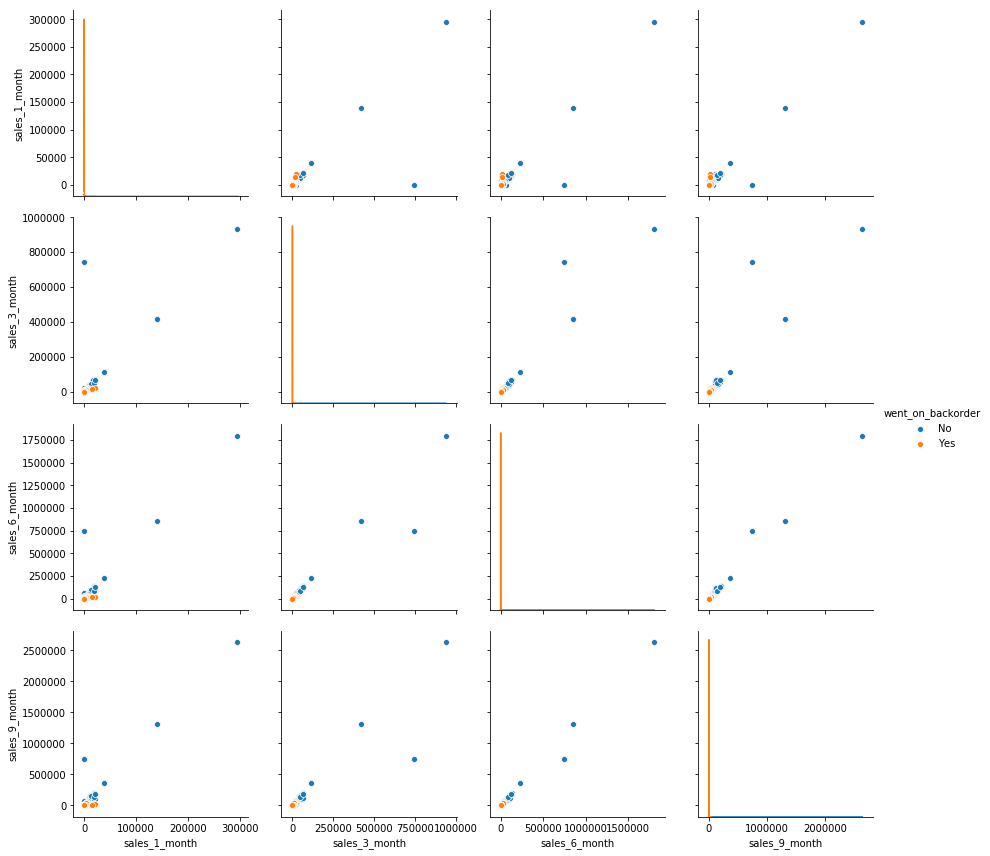

In [320]:
# Do a pair-wise scatter plot for sales
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
sns.pairplot(BackOrders, vars=sales, hue='went_on_backorder', size=3)
plt.show()

### sales pair-wise scatter plot explaination

* The sales over each time frame have good linear correlations with each other, as expected from the correlation matrix. There are some instances when the sales at different time frames fall away from the linear correlation. The sales range from 0 to over 1 million. Backorders only occur when sales are low.

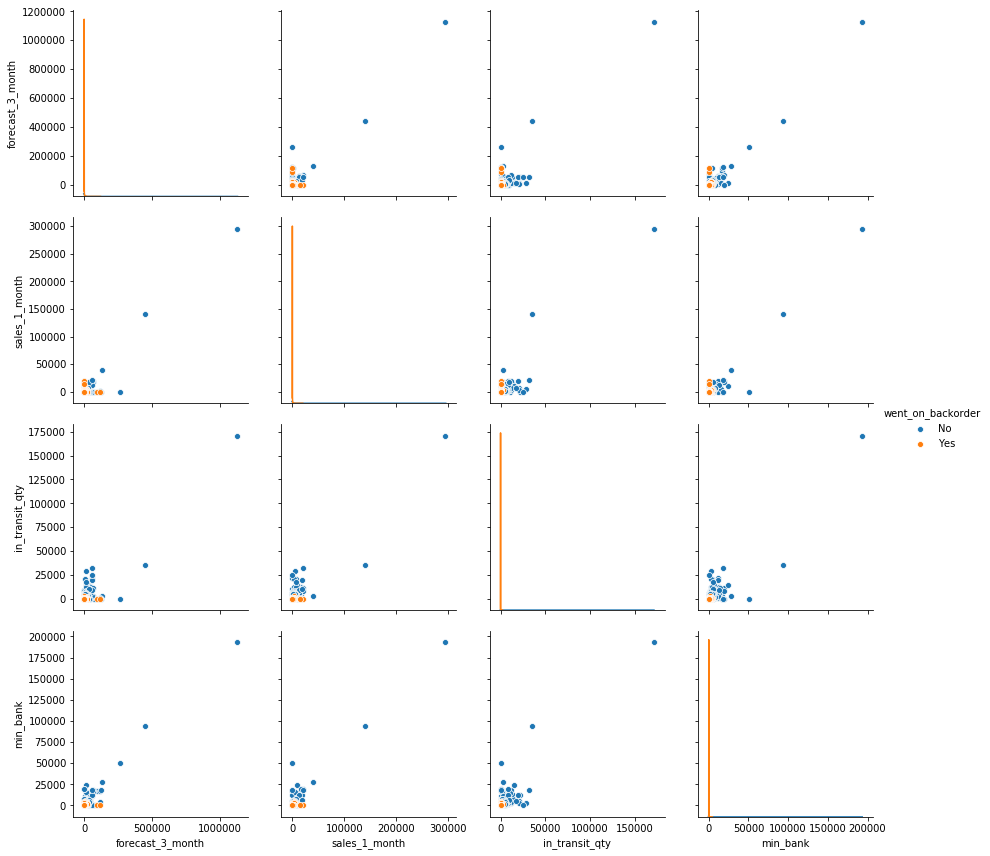

In [321]:
# Look at forecast, sales, in transit and recommended stock level in a pair-wise scatter plot
feature_set_1 = ['forecast_3_month', 'sales_1_month', 'in_transit_qty', 'min_bank']
sns.pairplot(BackOrders, vars=feature_set_1, hue='went_on_backorder', size=3)
plt.show()

### Explanation for the pair-wise scatter plot of forecast, sales and  in transit 

* The scatter plots show okay linear relationships between forecast, sales, in transit and recommended stock level. All the features range from 0 to over 300,000. Backorders only occur when the features are at low values.

* Due to the good correlations and sufficiently linear relationships between these features, they will all be represented by a single feature in the machine learning models. The feature chosen is sales_1_month. This is because past sales is measured, whereas the quantity in transit, recommended minimum stock and forecasts are likely derived from past sales.

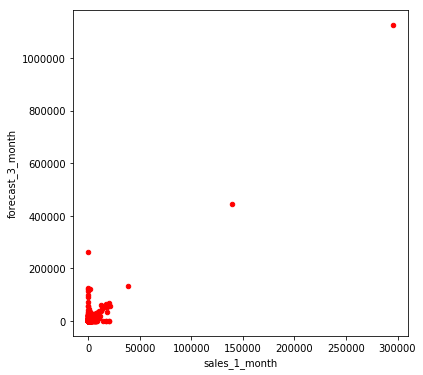

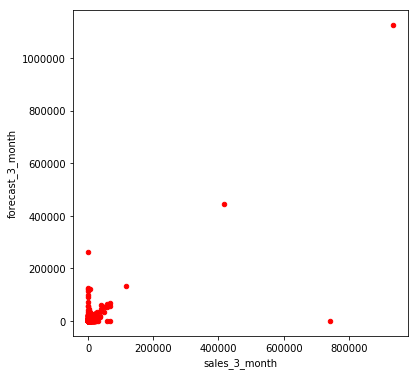

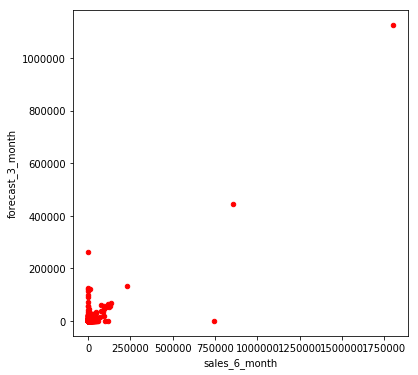

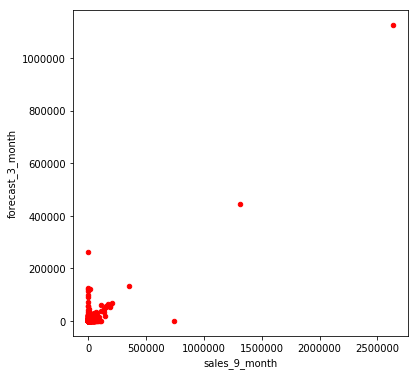

In [417]:
# Make scatter plots of the 3-month forecast against each of the sales
for col in sales:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    #BackOrders.plot(kind='scatter', x=col, y='forecast_3_month', ax=ax, color='DarkBlue', legend=True)
    BackOrders.plot(kind='scatter', x=col, y='forecast_3_month', ax=ax, color='Red')
    plt.show()
    

### Explaination on forecast and sales scatter plots

* There is a good linear relationship between sales and forecasts, as expected from the correlation matrix. 

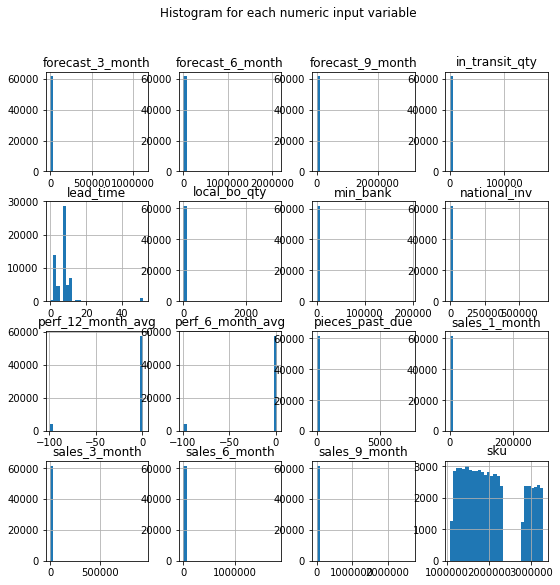

In [327]:
import pylab as pl
BackOrders.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('quant_hist')
plt.show()

## Plotting for Categorical variable

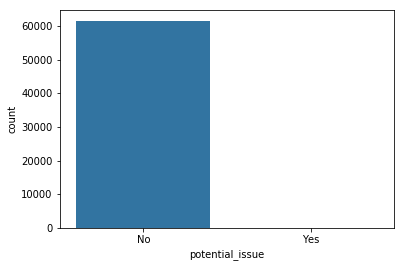

In [328]:
sns.countplot(x="potential_issue", data=BackOrders)
plt.show()


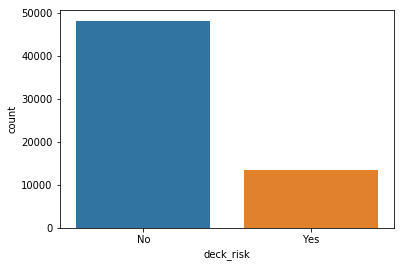

In [329]:
sns.countplot(x="deck_risk", data=BackOrders),
            
plt.show()



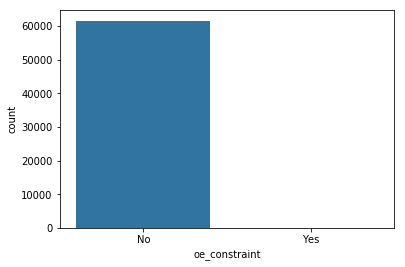

In [330]:
sns.countplot(x="oe_constraint", data=BackOrders),
            
plt.show()



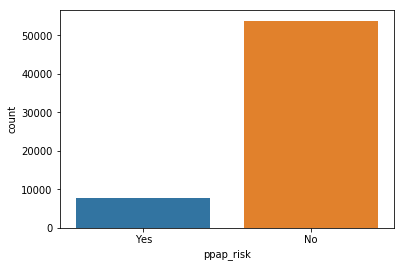

In [331]:
sns.countplot(x="ppap_risk", data=BackOrders),
            
plt.show()



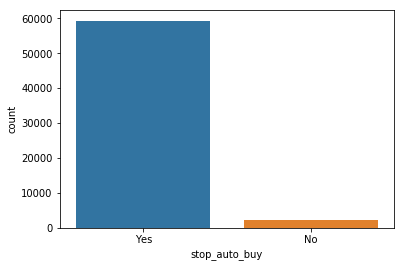

In [332]:
sns.countplot(x="stop_auto_buy", data=BackOrders),
            
plt.show()

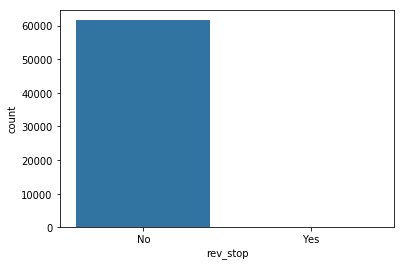

In [333]:
sns.countplot(x="rev_stop", data=BackOrders),
            
plt.show()

Text(0.5, 1.0, 'Went on backorder? (0=No, 1=Yes)')

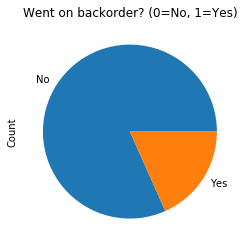

In [335]:
plt.figure()
BackOrders['went_on_backorder'].value_counts().plot(kind = 'pie')
plt.ylabel("Count")
plt.title('Went on backorder? (0=No, 1=Yes)')

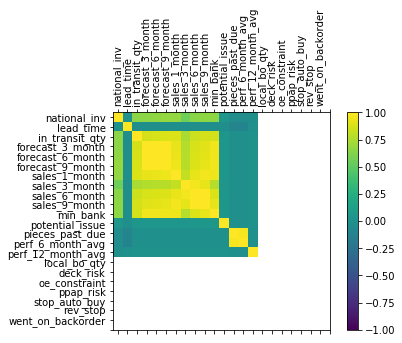

In [46]:
# Correction Matrix Plot of all variables
varnames=list(BackOrders)[1:]    
correlations = BackOrders[varnames].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(varnames,rotation=90)
ax.set_yticklabels(varnames)
plt.show()

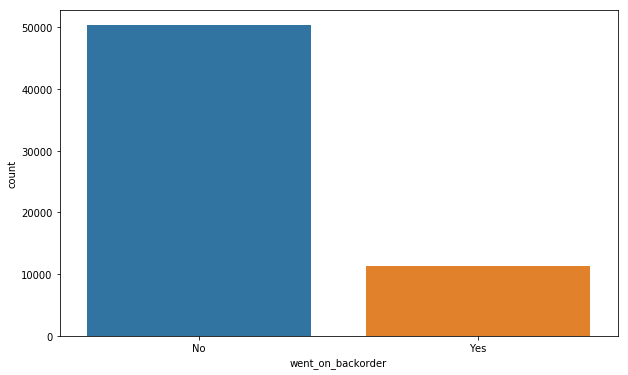

In [126]:
plt.figure(figsize=(10,6))
sns.countplot(x='went_on_backorder',data = BackOrders)

In [128]:
BackOrders.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.020724,0.651979,0.655001,0.671290,0.680849,0.672212,0.556370,0.642040,0.658480,0.657155,0.049484,-0.018762,-0.017978,-0.000683
lead_time,0.020724,1.000000,-0.005685,-0.005421,-0.005819,-0.005952,-0.006554,-0.003269,-0.004580,-0.004989,-0.006575,-0.004091,-0.086290,-0.096416,0.004479
in_transit_qty,0.651979,-0.005685,1.000000,0.869639,0.879642,0.886419,0.897961,0.742980,0.848198,0.872485,0.872010,0.053641,0.006700,0.006851,0.019894
forecast_3_month,0.655001,-0.005421,0.869639,1.000000,0.996295,0.993395,0.933090,0.769522,0.882274,0.910252,0.955484,0.051014,0.006973,0.007150,0.028685
forecast_6_month,0.671290,-0.005819,0.879642,0.996295,1.000000,0.998663,0.939881,0.775309,0.889307,0.917721,0.957815,0.050824,0.006584,0.006656,0.021604
forecast_9_month,0.680849,-0.005952,0.886419,0.993395,0.998663,1.000000,0.949189,0.782899,0.898183,0.927000,0.957987,0.050285,0.006175,0.006243,0.019933
sales_1_month,0.672212,-0.006554,0.897961,0.933090,0.939881,0.949189,1.000000,0.817417,0.936791,0.965754,0.948295,0.049411,0.001968,0.002649,0.022691
sales_3_month,0.556370,-0.003269,0.742980,0.769522,0.775309,0.782899,0.817417,1.000000,0.964163,0.929636,0.781151,0.039475,0.002311,0.002784,0.017978
sales_6_month,0.642040,-0.004580,0.848198,0.882274,0.889307,0.898183,0.936791,0.964163,1.000000,0.993628,0.896527,0.053755,0.002916,0.003389,0.017191
sales_9_month,0.658480,-0.004989,0.872485,0.910252,0.917721,0.927000,0.965754,0.929636,0.993628,1.000000,0.924600,0.056449,0.003416,0.003941,0.016164


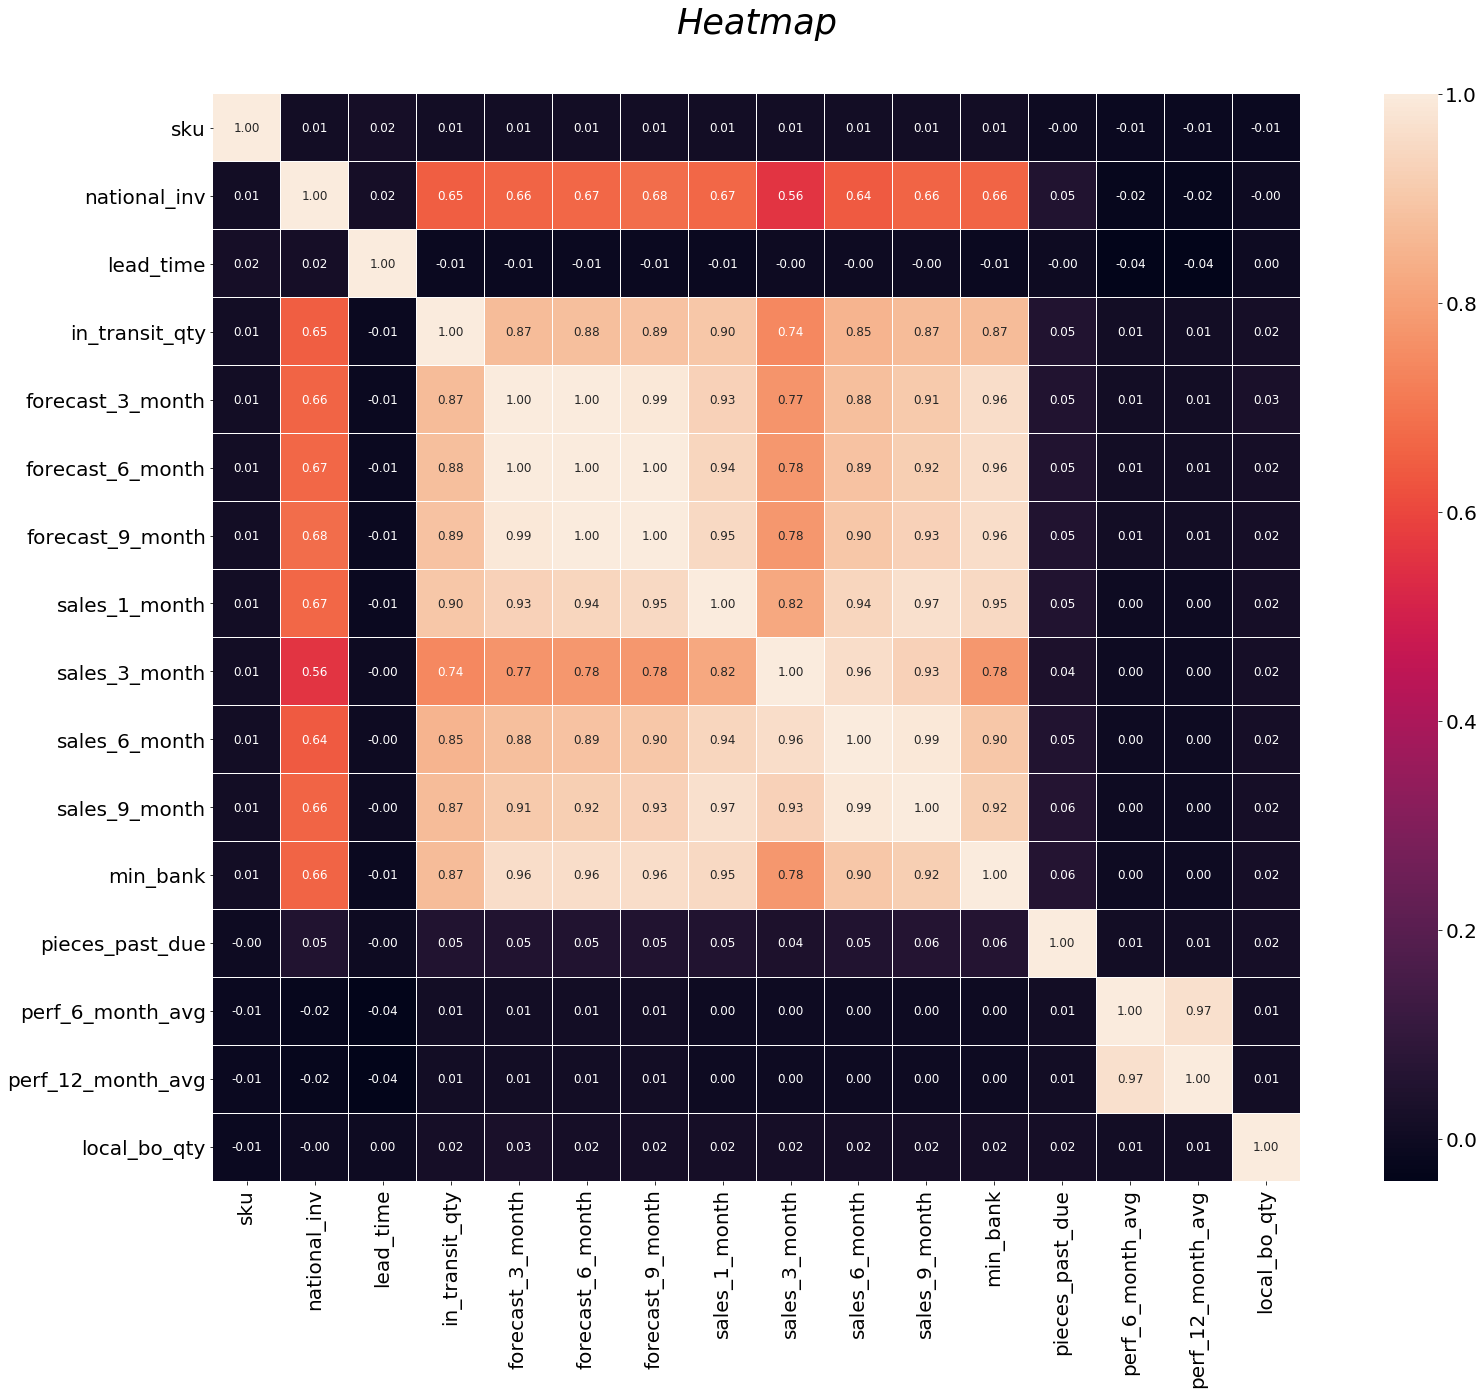

In [26]:
correlation_matrix = BackOrders.corr().round(2)
# annot = True to print the values inside the square
#plt.figure(figsize=(8, 8))  fmt="d"
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(30,20))# Sample figsize in inchesTrue
#title for heatmap
title = "Heatmap"
plt.title(title, fontsize = 35,color='Black', fontstyle='italic')
ttl = ax.title
ttl.set_position([0.5, 1.05])
p=sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f", linewidths=0.005, ax=ax, square=True, annot_kws={"size": 12})
plt.show()

In [27]:
p.get_figure().savefig('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/4 MODULE INSOFE CSE 7321c/20190303_Batch55_CSE7312c_Lab02_DeepLearning_HOT/heatmap.png')



### Correlation matrix explaination

* The correlation matrix shows that the quantity in transit, the forecast sales over 3/6/9 months, the actual sales over the previous 1/3/6/9 months, and minimum recommended stock level are highly correlated. This is not surprising because if an item had high real sales over the last 1/3/6/9 months, then it is reasonable for the forecast sales over the next 3/6/9 months to also be high. If forecast sales are high, then it would be useful to have more of the stock in hand and to have more shipped in.

* Besides that, the average performance over the last 6 months strongly correlates with that over the last 12 months.

* Overall, the correlation matrix suggests that the number of features used for predicting whether an item goes on back order can be lower than the number of features in the dataset. In other words, the dimensionality of the problem may be reduced.

# Imputation using Median

In [7]:
BackOrders = BackOrders.fillna(BackOrders.median())

# Create Dummies to the categorical variable

In [8]:
# Change categorical features from string to numerical
BackOrders_dummy = pd.get_dummies(BackOrders, columns = ['potential_issue', 'deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop',
'went_on_backorder'], drop_first = True)

In [9]:
BackOrders['went_on_backorder'] = BackOrders['went_on_backorder'].astype('category')
uniques = pd.factorize(BackOrders['went_on_backorder'])
print(uniques)



(array([0, 0, 0, ..., 0, 1, 1]), CategoricalIndex(['No', 'Yes'], categories=['No', 'Yes'], ordered=False, dtype='category'))


# Split The Dataset 

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
y=BackOrders_dummy['went_on_backorder_Yes']
X=BackOrders_dummy.drop(['went_on_backorder_Yes'],axis=1)

In [98]:
#X = np.array(BackOrders.loc[:, BackOrders.columns != 'went_on_backorder'])
#y = np.array(BackOrders.loc[:, BackOrders.columns == 'went_on_backorder'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Shape of X: (61589, 21)
Shape of y: (61589,)
Number transactions X_train dataset:  (43112, 21)
Number transactions y_train dataset:  (43112,)
Number transactions X_test dataset:  (18477, 21)
Number transactions y_test dataset:  (18477,)


# Change scale of data

In [99]:
# Use MinMaxScaler to convert features to range 0-1
# The label is already in the range 0-1, so it won't be affected by this.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Modeling

<div class="alert alert-block alert-info">
<b>Note:</b> we down sample the majority data during cross-validation, rather than before. This is so that each fold’s testing dataset is the same for every model (down sampling or no down sampling). Only the training datasets in each fold were down sampled.
</div>

# (1) PCA

In [485]:
#Principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train)
pca_X_train=pca.transform(X_train)
pca_X_train
pca_X_test=pca.transform(X_test)



In [486]:
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
explained_variance

array([1.90885422e-01, 1.10794524e-01, 1.09392882e-01, 3.25577444e-02,
       1.37516679e-02, 1.90374891e-03, 1.38966960e-03, 3.00711896e-04,
       2.48153575e-04, 2.08258613e-04, 1.29616123e-04, 4.01818359e-05,
       1.65166294e-05, 2.99830381e-06, 2.05705238e-06, 7.49528618e-07,
       1.38082238e-07, 1.01058962e-07, 2.03746602e-08, 1.29916469e-08])

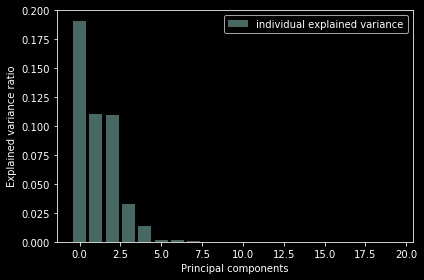

In [487]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(20), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# (2) Logistic Regression using PCA

In [488]:
logisticRegr_pca = LogisticRegression()#solver = 'lbfgs'

In [489]:
logisticRegr_pca.fit(pca_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [490]:
log_pred_pca = logisticRegr_pca.predict(pca_X_test)

In [491]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, log_pred_pca)
print(confusion_matrix)
accuracy_score(y_test, log_pred_pca)

[[15013     8]
 [ 3441    15]]


0.8133354981869351

In [492]:
from sklearn import metrics

from sklearn.metrics import classification_report , confusion_matrix

In [493]:
print(classification_report(y_test, log_pred_pca))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     15021
           1       0.65      0.00      0.01      3456

   micro avg       0.81      0.81      0.81     18477
   macro avg       0.73      0.50      0.45     18477
weighted avg       0.78      0.81      0.73     18477



In [ ]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
rfe = RFE(logreg, 19, step=1)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

# (3) Logistic Regression

In [496]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [497]:
log_pred_train = logreg.predict(X_test)



In [150]:
from sklearn.metrics import confusion_matrix

In [498]:
confusion_matrix = confusion_matrix(y_test, log_pred_train )
print(confusion_matrix)
accuracy_score(y_test, log_pred_train)

[[15013     8]
 [ 3441    15]]


0.8133354981869351

In [152]:
from sklearn import metrics

from sklearn.metrics import classification_report , confusion_matrix

In [499]:
print(classification_report(y_test, log_pred_train))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     15021
           1       0.65      0.00      0.01      3456

   micro avg       0.81      0.81      0.81     18477
   macro avg       0.73      0.50      0.45     18477
weighted avg       0.78      0.81      0.73     18477



# ROC Curve

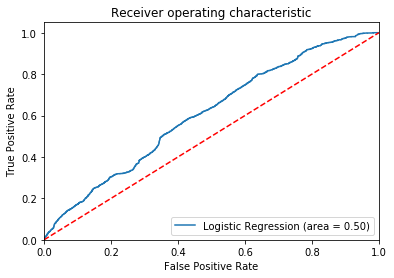

In [500]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logistic regression with cross-validation

In [101]:
from sklearn.model_selection import cross_val_score

In [103]:
# 10-fold cross-validation logistic regression
logreg_cv = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg_cv, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg_cv, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg_cv, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg_cv.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg_cv.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg_cv.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.834
LogisticRegression average log_loss is 0.552
LogisticRegression average auc is 0.822


# (4) Naive Bays

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

In [158]:
 nb_predicted = gnb_classifier.predict(X_test)

In [169]:
confusion_matrix = metrics.confusion_matrix(y_test, nb_predicted)
print(confusion_matrix)
print('accuracy_score:', accuracy_score(y_test, nb_predicted))

[[  745 14276]
 [   31  3425]]
accuracy_score: 0.2256859879850625


In [160]:
print(classification_report(y_test, nb_predicted))

              precision    recall  f1-score   support

           0       0.96      0.05      0.09     15021
           1       0.19      0.99      0.32      3456

   micro avg       0.23      0.23      0.23     18477
   macro avg       0.58      0.52      0.21     18477
weighted avg       0.82      0.23      0.14     18477



# (5) (a) SVM

In [177]:
from sklearn import svm
from sklearn.svm import SVC

In [179]:
SVM_model= svm.SVC(kernel='linear', C=1, gamma=1, random_state=10) 
SVM_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [181]:
 SVM_predicted = SVM_model.predict(X_test)

In [182]:
confusion_matrix = metrics.confusion_matrix(y_test, SVM_predicted)
print(confusion_matrix)
print('accuracy_score:', accuracy_score(y_test, SVM_predicted))

[[15013     8]
 [ 3440    16]]
accuracy_score: 0.8133896195269795


In [183]:
print(classification_report(y_test,  SVM_predicted))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     15021
           1       0.67      0.00      0.01      3456

   micro avg       0.81      0.81      0.81     18477
   macro avg       0.74      0.50      0.45     18477
weighted avg       0.79      0.81      0.73     18477



In [185]:
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# (5) (b) SVM using Grid search

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
#svm with grid search
svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
svm_gs = GridSearchCV(svm, parameters)
svm_gs.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': (1, 0.25, 0.5, 0.75), 'gamma': (1, 2, 3, 'auto'), 'decision_function_shape': ('ovo', 'ovr'), 'shrinking': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [191]:
 SVM_predicted_gs = svm_gs.predict(X_test)

In [192]:
confusion_matrix = metrics.confusion_matrix(y_test,  SVM_predicted_gs)
print(confusion_matrix)
print('accuracy_score:', accuracy_score(y_test, SVM_predicted_gs))

[[15007    14]
 [ 3428    28]]
accuracy_score: 0.8137143475672458


In [193]:
print(classification_report(y_test, SVM_predicted_gs))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     15021
           1       0.67      0.01      0.02      3456

   micro avg       0.81      0.81      0.81     18477
   macro avg       0.74      0.50      0.46     18477
weighted avg       0.79      0.81      0.73     18477



# (6) KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier


In [195]:
#K=3
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [197]:
 KNN_model_predicted =  KNN_model.predict(X_test)

In [198]:
confusion_matrix = metrics.confusion_matrix(y_test, KNN_model_predicted)
print(confusion_matrix)
print('accuracy_score:', accuracy_score(y_test, KNN_model_predicted))

[[13721  1300]
 [ 2776   680]]
accuracy_score: 0.7794014179791091


In [199]:
print(classification_report(y_test, KNN_model_predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     15021
           1       0.34      0.20      0.25      3456

   micro avg       0.78      0.78      0.78     18477
   macro avg       0.59      0.56      0.56     18477
weighted avg       0.74      0.78      0.75     18477



In [202]:
#K=5
KNN_model_5 = KNeighborsClassifier(n_neighbors=5)
KNN_model_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [203]:
 KNN_model_predicted5 =  KNN_model_5.predict(X_test)

In [204]:
confusion_matrix = metrics.confusion_matrix(y_test, KNN_model_predicted5)
print(confusion_matrix)
print('accuracy_score:', accuracy_score(y_test, KNN_model_predicted5))

[[14084   937]
 [ 2911   545]]
accuracy_score: 0.7917410835092277


In [205]:
print(classification_report(y_test, KNN_model_predicted5))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     15021
           1       0.37      0.16      0.22      3456

   micro avg       0.79      0.79      0.79     18477
   macro avg       0.60      0.55      0.55     18477
weighted avg       0.74      0.79      0.76     18477



In [206]:
#K=7
KNN_model_7 = KNeighborsClassifier(n_neighbors=7)
KNN_model_7.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [207]:
 KNN_model_predicted7 =  KNN_model_7.predict(X_test)

In [208]:
confusion_matrix = metrics.confusion_matrix(y_test, KNN_model_predicted7)
print(confusion_matrix)
print('accuracy_score:', accuracy_score(y_test, KNN_model_predicted7))

[[14304   717]
 [ 3003   453]]
accuracy_score: 0.7986686150349083


In [209]:
print(classification_report(y_test, KNN_model_predicted7))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     15021
           1       0.39      0.13      0.20      3456

   micro avg       0.80      0.80      0.80     18477
   macro avg       0.61      0.54      0.54     18477
weighted avg       0.74      0.80      0.76     18477



# (7) Decision Tree

In [501]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [502]:
DT_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(DT_pred)

Predicted values:
[0 1 0 ... 0 0 0]


In [503]:
from sklearn.metrics import confusion_matrix


In [504]:
confusion_matrix1 = confusion_matrix(y_test,DT_pred)
print(confusion_matrix1)
accuracy_score(y_test, DT_pred)

[[14302   719]
 [ 1732  1724]]


0.8673485955512259

In [505]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     15021
           1       0.71      0.50      0.58      3456

   micro avg       0.87      0.87      0.87     18477
   macro avg       0.80      0.73      0.75     18477
weighted avg       0.86      0.87      0.86     18477



# ROC Curve

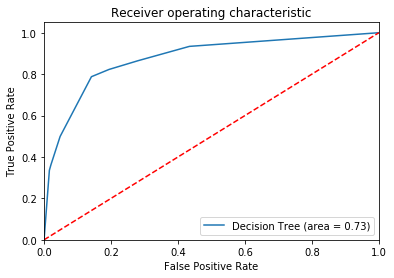

In [506]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, clf_gini.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_gini.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

# (8) (a) Random Forest

In [507]:
RF_model = RandomForestClassifier(n_jobs = -1,n_estimators = 1000, random_state=42, max_depth=2,criterion='gini', min_samples_split=2, oob_score=True)
RF_model.fit(X_train, y_train)
RF_model_pred = RF_model.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix

In [509]:
confusion_matrix = confusion_matrix(y_test, RF_model_pred)
print(confusion_matrix)
accuracy_score(y_test, RF_model_pred)

[[14993    28]
 [ 3297   159]]


0.8200465443524382

In [510]:
print(classification_report(y_test, RF_model_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     15021
           1       0.85      0.05      0.09      3456

   micro avg       0.82      0.82      0.82     18477
   macro avg       0.84      0.52      0.49     18477
weighted avg       0.83      0.82      0.75     18477



# ROC Curve

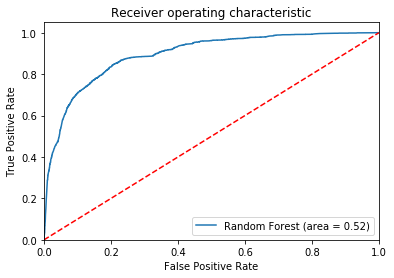

In [512]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, RF_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# (8) (b) Random Forest

In [210]:
#create a blank dataframe to fill
#BackOrders_pred=pd.DataFrame(data=None,index=BackOrders.index)

#Define folds for  10-fold Cross Validation
kf = KFold(n_splits=10,shuffle=True,random_state=123)  

#Define index of dataset (to help in data sepparations within folds)
#ind=BackOrders.index


In [211]:
#---------------------------------------------------------------#
    #Function to fit models
    def fitrandomforests(n_est,maxfeat,minleaf):
        
        #names of model predictions based on tuning parameter inputs
        varname= "pred_nest%s_feat%s_leaf%s" % (n_est,maxfeat,minleaf)
        varname2= "pred_down_nest%s_feat%s_leaf%s" % (n_est,maxfeat,minleaf)
        
        #Fit a Random Forest model
        rf=RandomForestClassifier(n_estimators=n_est,
                                  max_features=maxfeat,
                                  min_samples_leaf=minleaf)
        rf.fit(X_train,y_train)
        preds=rf.predict_proba(X_test)[:,1]
     
       # merged_test[varname]=preds
        


In [212]:
 #---------------------------------------------------------------#
    
    #Tuning parameter grids
    
    #number of trees (more is better for prediction but slower)
    n_est=50
    #maximum features tried
    maxfeatgrid=[3,5,7]
    #Minimum samples per leaf
    minleafgrid=[5,10,30]
    

    #fit models
    for feat in maxfeatgrid:
        for leaf in minleafgrid:
            fitrandomforests(n_est,feat,leaf)

In [527]:
rf_model2=RandomForestClassifier(n_estimators=10,
                          max_features=20,
                          min_samples_leaf=5)
rf_model2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [528]:
RF_model2_pred = rf_model2.predict(X_test)

In [529]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, RF_model2_pred)
print(confusion_matrix)
accuracy_score(y_test, RF_model2_pred)

[[14355   666]
 [  864  2592]]


0.9171943497320993

In [530]:
print(classification_report(y_test, RF_model2_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15021
           1       0.80      0.75      0.77      3456

   micro avg       0.92      0.92      0.92     18477
   macro avg       0.87      0.85      0.86     18477
weighted avg       0.92      0.92      0.92     18477



# ROC Curve

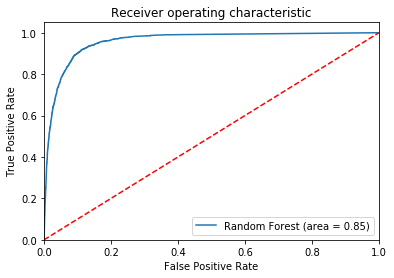

In [531]:
RF2_roc_auc = roc_auc_score(y_test, rf_model2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % RF2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF2_ROC')
plt.show()

## importance of variables

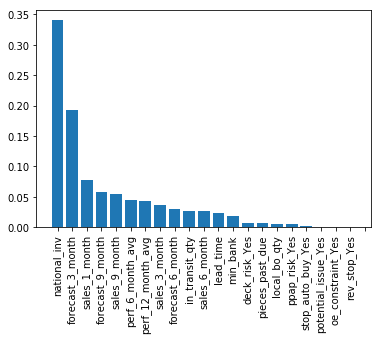

In [532]:
#importance of variables
list(zip(list(X),rf_model2.feature_importances_))
importance = rf_model2.feature_importances_
importance = pd.DataFrame(importance, index=X.columns,columns=["Importance"])
importance["Std"] = np.std([rf_model2.feature_importances_ for tree in rf_model2.estimators_], axis=0)
importance=importance.sort_values(['Importance'],ascending=False)

#plot importances
xlim = range(importance.shape[0])
plt.bar(xlim, importance['Importance'], yerr=importance['Std'], align="center")
plt.xticks(range(0,22), importance.index,rotation=90)
plt.show()


In [ ]:
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

# (9) AdaBoost

In [533]:
from sklearn.ensemble import AdaBoostClassifier



In [534]:
Adaboost_model = AdaBoostClassifier(n_estimators=100,
    learning_rate=1)


Adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)

In [535]:
Ada_pred=Adaboost_model.predict(X_test)



In [536]:
confusion_matrix = metrics.confusion_matrix(y_test, Ada_pred)
print(confusion_matrix)
accuracy_score(y_test, Ada_pred)

[[14379   642]
 [ 1246  2210]]


0.8978189099962115

In [537]:
print(classification_report(y_test, Ada_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     15021
           1       0.77      0.64      0.70      3456

   micro avg       0.90      0.90      0.90     18477
   macro avg       0.85      0.80      0.82     18477
weighted avg       0.89      0.90      0.89     18477



# ROC Curve

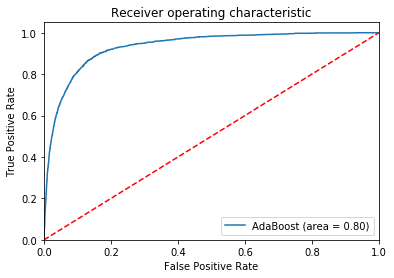

In [539]:
AB_roc_auc = roc_auc_score(y_test, Adaboost_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Adaboost_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % AB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AB_ROC')
plt.show()

# (10) Gradient GBM Classifier

In [540]:
from sklearn.ensemble import GradientBoostingClassifier

In [541]:
gbm_model = GradientBoostingClassifier(n_estimators=50,learning_rate=0.3, max_features=2, max_depth = 2, random_state = 0)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [542]:
preds_gbm = gbm_model.predict(X_test)

In [543]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test,preds_gbm)
print(confusion_matrix1)
accuracy_score(y_test, preds_gbm)

[[14404   617]
 [ 1333  2123]]


0.89446338691346

In [544]:
print(classification_report(y_test, preds_gbm))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     15021
           1       0.77      0.61      0.69      3456

   micro avg       0.89      0.89      0.89     18477
   macro avg       0.85      0.79      0.81     18477
weighted avg       0.89      0.89      0.89     18477



# ROC Curve

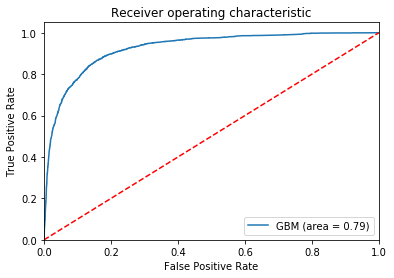

In [545]:
GBM_roc_auc = roc_auc_score(y_test, gbm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GBM (area = %0.2f)' % GBM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBM_ROC')
plt.show()

# (11) XGBoost

In [546]:
import xgboost as xgb

from xgboost import XGBClassifier 

In [547]:
xg_Clas = xgb.XGBClassifier(learning_rate =0.7,
 n_estimators=500,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xg_Clas.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [548]:
preds_xgb = xg_Clas.predict(X_test)

In [549]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test,preds_xgb)
print(confusion_matrix1)

[[14338   683]
 [  847  2609]]


In [550]:
accuracy_score(y_test, preds_xgb)

0.9171943497320993

In [551]:
print(classification_report(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15021
           1       0.79      0.75      0.77      3456

   micro avg       0.92      0.92      0.92     18477
   macro avg       0.87      0.85      0.86     18477
weighted avg       0.92      0.92      0.92     18477



## ROC Curve

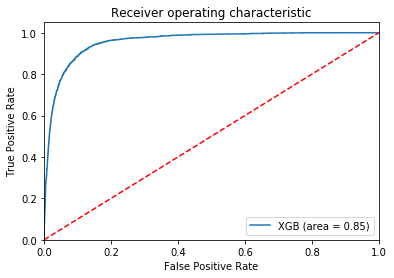

In [552]:
XGB_roc_auc = roc_auc_score(y_test, xg_Clas.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xg_Clas.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % XGB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

#### Important feature using XGBoost


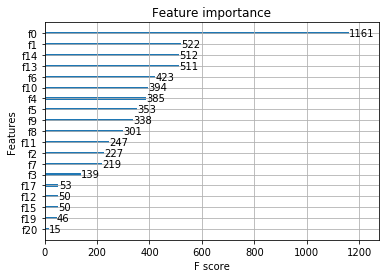

In [131]:
xgb.plot_importance(xg_Clas)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

<div class="alert alert-block alert-success">
<b>Best Accuracy :</b> Using All model XGBoost gives the best Accuracy i.e. 91.71%
</div>

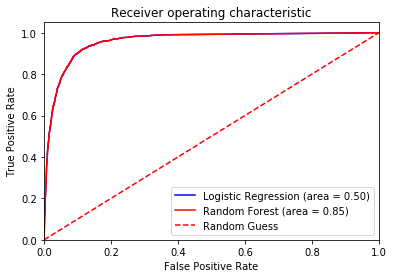

In [600]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#knn_roc_auc = roc_auc_score(y_test, KNN_model_7.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, KNN_model_7.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf_model2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, 'b', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, 'r', label='Random Forest (area = %0.2f)' % rf_roc_auc)
#plt.plot(fpr, tpr, 'g', label='KNN (area = %0.2f)' % knn_roc_auc)

plt.plot([0, 1], [0, 1],'r--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()#KNN_model_7 

# Regularization

In [263]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [266]:
Rid_Reg = RidgeClassifier()
lasso_Reg = linear_model.Lasso(alpha=0.1)
EN_Reg = ElasticNet(alpha=0.5) 
Rid_Reg.fit(X_train, y_train)
lasso_Reg.fit(X_train, y_train)
EN_Reg.fit(X_train, y_train)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [257]:
print("R2 for Ridge")
np.round(Rid_Reg.score(X_test,y_test)*100,2)

R2 for Ridge


81.36

In [267]:
print("R2 for Lasso")
np.round(lasso_Reg.score(X_test,y_test)*100,2)

R2 for Lasso


-0.02

In [254]:
print("R2 for Lasso")
np.round(EN_Reg.score(X_test,y_test)*100,2)

R2 for Lasso


-0.02

In [249]:
Rid_Reg_pred = Rid_Reg.predict(X_test)
lasso_Reg_pred =lasso_Reg.predict(X_test)

EN_Reg_pred =EN_Reg.predict(X_test)




In [250]:
print("MSE for Ridge")
np.round(metrics.mean_squared_error(y_test,Rid_Reg_pred),2)

MSE for Ridge


0.14

In [251]:
print("MSE for Lasso")
np.round(metrics.mean_squared_error(y_test,lasso_Reg_pred),2)

MSE for Lasso


0.15

In [252]:
print("MSE for Elastic Net")
np.round(metrics.mean_squared_error(y_test,EN_Reg_pred),2)

MSE for Elastic Net


0.15

## Voting Ensemble for Classification

In [589]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold




In [592]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
#model3 = SVC()
#estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())



0.8369190021852964


In [593]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.84 (+/- 0.01) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.23 (+/- 0.00) [Naive Bayes]


In [598]:
!pip install mlxtend  

    100% |████████████████████████████████| 1.3MB 1.2MB/s ta 0:00:011


In [599]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.83 (+/- 0.00) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.23 (+/- 0.00) [Naive Bayes]
Accuracy: 0.93 (+/- 0.00) [Ensemble]


# Deep Learning Model

In [1]:
conda install nomkl

Solving environment: done

## Package Plan ##

  environment location: /Users/priyavivekbhandarkar/anaconda3

  added / updated specs:
    - nomkl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          48 KB
    libopenblas-0.3.3          |       hdc02c5d_3         8.4 MB
    mkl_fft-1.0.1              |   py36h917ab60_0         125 KB
    mkl_random-1.0.1           |   py36h78cc56f_0         346 KB
    nomkl-3.0                  |                0          48 KB
    numpy-1.16.2               |   py36h926163e_0          48 KB
    numpy-base-1.16.2          |   py36ha711998_0         4.2 MB
    scipy-1.2.1                |   py36h1a1e112_0        15.8 MB
    ------------------------------------------------------------
                                           Total:        29.0 MB

The following NEW packages will be INSTALLED:

  libopen

In [10]:
X1 = BackOrders_dummy.iloc[:, 3:21].values
y1 = BackOrders_dummy.iloc[:, 21].values


In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)

In [12]:
X_train1.shape

(49271, 18)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)


In [14]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
#Initializing Neural Network
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim =  18,))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [83]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
_________________________________________________________________
dense_30 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_31 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 21        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling Neural Network
from keras.optimizers import Adam
classifier.compile(optimizer = Adam(lr = 0.01),  loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Fitting our model 
classifier.fit(X_train1, y_train1, batch_size = 10, nb_epoch = 10)

Epoch 1/10
49271/49271 [==============================] - 23s 460us/step - loss: 0.4587 - acc: 0.8190
Epoch 2/10
49271/49271 [==============================] - 21s 434us/step - loss: 0.4451 - acc: 0.8267
Epoch 3/10
49271/49271 [==============================] - 21s 426us/step - loss: 0.4392 - acc: 0.8264
Epoch 4/10
49271/49271 [==============================] - 22s 442us/step - loss: 0.4309 - acc: 0.8284
Epoch 5/10
49271/49271 [==============================] - 23s 473us/step - loss: 0.4243 - acc: 0.8293
Epoch 6/10
49271/49271 [==============================] - 22s 437us/step - loss: 0.4290 - acc: 0.8212
Epoch 7/10
49271/49271 [==============================] - 21s 432us/step - loss: 0.4241 - acc: 0.8225
Epoch 8/10
49271/49271 [==============================] - 22s 441us/step - loss: 0.4112 - acc: 0.8301
Epoch 9/10
49271/49271 [==============================] - 23s 472us/step - loss: 0.4225 - acc: 0.8303
Epoch 10/10
49271/49271 [==============================] - 23s 470us/step - loss: 

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test1)
y_pred = (y_pred > 0.35)

In [20]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred)
cm

array([[9532,  508],
       [1694,  584]])

In [21]:
print(cm)
accuracy_score(y_test1, y_pred)

[[9532  508]
 [1694  584]]


0.8212372138334145

In [22]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     10040
           1       0.53      0.26      0.35      2278

   micro avg       0.82      0.82      0.82     12318
   macro avg       0.69      0.60      0.62     12318
weighted avg       0.79      0.82      0.79     12318



In [23]:
# evaluate the model
scores = classifier.evaluate(X_test1, y_test1)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

12318/12318 [==============================] - 1s 56us/step

acc: 82.55%


In [24]:
test_pred = classifier.predict_classes(X_test1)
print(test_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [25]:
score = classifier.evaluate(X_test1, y_test1)

12318/12318 [==============================] - 0s 37us/step


In [26]:
print(classifier.metrics_names)
print(score)

['loss', 'acc']
[0.4198896785383585, 0.825458678385909]


### Learning rate finder

In [27]:
from keras.callbacks import Callback

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
 
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [28]:
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#### A basic triangular cycle with no amplitude scaling.

In [29]:
from keras.optimizers import SGD

clr_triangular = CyclicLR(base_lr=0.001, max_lr=0.006, step_size=10, mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle')

model.compile(optimizer=SGD(0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
from keras import backend as K

model.fit(X_train1, y_train1,
          validation_data=(X_test1, y_test1),
          batch_size=16, epochs=10, 
          callbacks=[clr_triangular], verbose=1)

Train on 49271 samples, validate on 12318 samples
Epoch 1/10
49271/49271 [==============================] - 21s 434us/step - loss: 0.5126 - acc: 0.8169 - val_loss: 0.4764 - val_acc: 0.8151
Epoch 2/10
49271/49271 [==============================] - 20s 403us/step - loss: 0.4716 - acc: 0.8170 - val_loss: 0.4726 - val_acc: 0.8151
Epoch 3/10
49271/49271 [==============================] - 21s 423us/step - loss: 0.4689 - acc: 0.8171 - val_loss: 0.4708 - val_acc: 0.8151
Epoch 4/10
49271/49271 [==============================] - 19s 393us/step - loss: 0.4674 - acc: 0.8171 - val_loss: 0.4699 - val_acc: 0.8152
Epoch 5/10
49271/49271 [==============================] - 20s 397us/step - loss: 0.4665 - acc: 0.8173 - val_loss: 0.4692 - val_acc: 0.8156
Epoch 6/10
49271/49271 [==============================] - 20s 413us/step - loss: 0.4658 - acc: 0.8176 - val_loss: 0.4687 - val_acc: 0.8154
Epoch 7/10
49271/49271 [==============================] - 20s 415us/step - loss: 0.4652 - acc: 0.8175 - val_loss: 0.

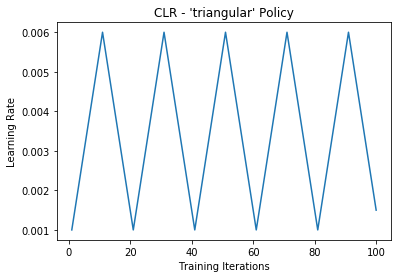

In [31]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.plot(clr_triangular.history['iterations'][:100], clr_triangular.history['lr'][:100])

#### A basic triangular cycle that scales initial amplitude by half each cycle.


In [32]:
clr_triangular = CyclicLR(mode='triangular2',step_size=10)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(X_train1, y_train1,
          validation_data=(X_test1, y_test1), 
          batch_size=16,epochs=10,
          callbacks = [clr_triangular],
          verbose=1)

Train on 49271 samples, validate on 12318 samples
Epoch 1/10
49271/49271 [==============================] - 20s 411us/step - loss: 0.4629 - acc: 0.8175 - val_loss: 0.4661 - val_acc: 0.8151
Epoch 2/10
49271/49271 [==============================] - 19s 393us/step - loss: 0.4628 - acc: 0.8176 - val_loss: 0.4659 - val_acc: 0.8151
Epoch 3/10
49271/49271 [==============================] - 20s 402us/step - loss: 0.4626 - acc: 0.8176 - val_loss: 0.4657 - val_acc: 0.8151
Epoch 4/10
49271/49271 [==============================] - 20s 408us/step - loss: 0.4624 - acc: 0.8176 - val_loss: 0.4656 - val_acc: 0.8153
Epoch 5/10
49271/49271 [==============================] - 23s 462us/step - loss: 0.4623 - acc: 0.8176 - val_loss: 0.4654 - val_acc: 0.8153
Epoch 6/10
49271/49271 [==============================] - 20s 414us/step - loss: 0.4621 - acc: 0.8176 - val_loss: 0.4652 - val_acc: 0.8153
Epoch 7/10
49271/49271 [==============================] - 20s 409us/step - loss: 0.4619 - acc: 0.8176 - val_loss: 0.

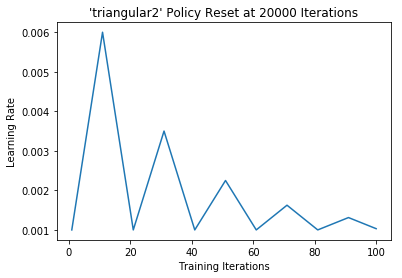

In [34]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("'triangular2' Policy Reset at 20000 Iterations")
plt.plot(clr_triangular.history['iterations'][:100], clr_triangular.history['lr'][:100])

#### A cycle that scales initial amplitude by gamma**(cycle iterations) at each cycle iteration.

In [74]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.88884,step_size=10)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(X_train1, y_train1,validation_data=(X_test1, y_test1), batch_size=16, epochs=10, callbacks=[clr_triangular], verbose=1)

Train on 49271 samples, validate on 12318 samples
Epoch 1/10
49271/49271 [==============================] - 20s 398us/step - loss: 0.4088 - acc: 0.8183 - val_loss: 0.4195 - val_acc: 0.8103
Epoch 2/10
49271/49271 [==============================] - 21s 422us/step - loss: 0.4061 - acc: 0.8183 - val_loss: 0.4151 - val_acc: 0.8103
Epoch 3/10
49271/49271 [==============================] - 20s 409us/step - loss: 0.3968 - acc: 0.8183 - val_loss: 0.4040 - val_acc: 0.8103
Epoch 4/10
49271/49271 [==============================] - 22s 437us/step - loss: 0.3886 - acc: 0.8183 - val_loss: 0.4006 - val_acc: 0.8103
Epoch 5/10
49271/49271 [==============================] - 20s 415us/step - loss: 0.4000 - acc: 0.8183 - val_loss: 0.4147 - val_acc: 0.8103
Epoch 6/10
49271/49271 [==============================] - 18s 368us/step - loss: 0.3995 - acc: 0.8183 - val_loss: 0.3954 - val_acc: 0.8103
Epoch 7/10
49271/49271 [==============================] - 18s 361us/step - loss: 0.3862 - acc: 0.8183 - val_loss: 0.

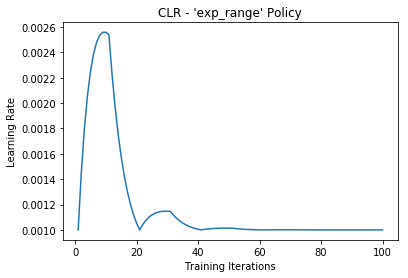

In [76]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'][:100], clr_triangular.history['lr'][:100])

#### Stochastic Gradient Descent with Restarts

In [77]:
class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.
    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.
    
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor
        self.trn_iterations = 0.

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        
        self.trn_iterations += 1
        self.history.setdefault('iterations', []).append(self.trn_iterations)
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        
        
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

In [79]:
sgdr_schedule = SGDRScheduler(min_lr=0.001,
                                     max_lr=0.006,
                                     steps_per_epoch=np.ceil(X_train1.shape[0]/16),
                                     lr_decay=0.8,
                                     cycle_length=5,
                                     mult_factor=2)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model.fit(X_train1, y_train1,validation_data=(X_test1, y_test1), batch_size=16, epochs=10, callbacks=[sgdr_schedule], verbose=1)

Train on 49271 samples, validate on 12318 samples
Epoch 1/10
49271/49271 [==============================] - 22s 447us/step - loss: 0.4267 - acc: 0.8160 - val_loss: 0.4006 - val_acc: 0.8103
Epoch 2/10
49271/49271 [==============================] - 19s 389us/step - loss: 0.3849 - acc: 0.8183 - val_loss: 0.3969 - val_acc: 0.8103
Epoch 3/10
49271/49271 [==============================] - 19s 396us/step - loss: 0.3845 - acc: 0.8183 - val_loss: 0.4008 - val_acc: 0.8103
Epoch 4/10
49271/49271 [==============================] - 19s 384us/step - loss: 0.3855 - acc: 0.8181 - val_loss: 0.3986 - val_acc: 0.8103
Epoch 5/10
49271/49271 [==============================] - 18s 375us/step - loss: 0.3848 - acc: 0.8180 - val_loss: 0.3980 - val_acc: 0.8103
Epoch 6/10
49271/49271 [==============================] - 18s 375us/step - loss: 0.3833 - acc: 0.8183 - val_loss: 0.3973 - val_acc: 0.8103
Epoch 7/10
49271/49271 [==============================] - 18s 375us/step - loss: 0.3826 - acc: 0.8183 - val_loss: 0.

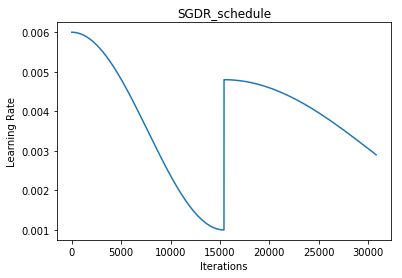

In [81]:
plt.xlabel('Iterations')
plt.ylabel('Learning Rate')
plt.title("SGDR_schedule")
plt.plot(sgdr_schedule.history['iterations'], sgdr_schedule.history['lr'])

# Conclusion

* We focused on the prediction accuracy. Our objective is to learn a model that has a good generalization performance. Such a model maximizes the prediction accuracy. We identified the machine learning algorithm that is best-suited for the problem at hand (i.e. Backorder classification); therefore, we compared different algorithms and selected the best-performing  model. XGBoost Model scored 91.71%.

# Future Scope

1) Grid Search for XGB, Adaboost and GBM.

2) May be used Smote

3) Feature Engineering

4) Improve Accuracy

5) Model Explainantion

6) Boxplot